# Business Scenario and Problem Statement

## Introduction

In this analysis, we are presented with a dataset containing information about used cars. The dataset includes details such as the brand, year, kilometers driven, seating capacity, transmission type, price, location, change of ownership fee, and yearly tax. Our objective is to gain insights from the data and address key business questions related to the used car market.

## Business Problem

The primary business problem we aim to address is understanding the factors that influence the pricing of used cars. This knowledge can be valuable for various stakeholders, including car sellers, buyers, and insurance companies. We also aim to explore the impact of location on change of ownership fees and yearly taxes for used cars.

## Key Questions

To achieve the business objective, we need to answer the following key questions:

1. What are the main factors that affect the pricing of used cars?
2. How does the age (year) of a car influence its price?
3. Are there significant variations in pricing across different car brands?
4. How does the location (region) affect the change of ownership fees and yearly taxes?
5. What insights can we extract from the data that can inform pricing strategies, buying decisions, and insurance considerations?

### Description of Variables in the Used Car Dataset

In this dataset, there are various variables that provide information about used cars for analysis. Here's a brief description of each variable:

| Variable                | Description                                          |
|-------------------------|------------------------------------------------------|
| date                    | the day that the advertising was published           |
| Brand                   | The brand or manufacturer of the car                |
| Name                    | The specific name or model of the car              |
| Year                    | The manufacturing year of the car                  |
| Kilometer               | The number of kilometers the car has been driven   |
| Capacity                | Seating capacity of the car                         |
| Transmission            | The type of transmission (e.g., Manual, Automatic)  |
| Price                   | The price of the car in local currency              |
| Location                | The location where the car is being sold            |
| Change_of_ownership_fee | The fee associated with changing the car's ownership|
| Yearly_tax              | The yearly tax amount for the car                  |


These variables provide valuable information for analyzing the used car market, understanding pricing factors, and making informed decisions related to buying and selling used cars.

## Approach

We will perform data cleaning, exploration, and analysis to answer the key questions and gain insights from the dataset. This analysis will help us provide recommendations and make informed decisions related to the used car market.

Let's start by loading the data and conducting exploratory data analysis (EDA) to better understand the dataset and address the business problem.


## Import packages

In [1]:
# Import necessary packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning packages for regression (predicting car prices)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error,make_scorer,r2_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import plot_importance

# Additional packages for data analysis and preprocessing
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime

## Load dataset

In [2]:
df = pd.read_csv("mobil1234.csv")
df.head()

,web-scraper-order,web-scraper-start-url,links,links-href,date,Brand,Name,Year,Kilometer,capacity,transmission,price,location
0,1698941601-1,https://www.mobil123.com/mobil-dijual/indonesi...,2007 Daihatsu Xenia 1.0 Li MPV - Manual,https://www.mobil123.com/dijual/daihatsu-xenia...,Diperbarui pada: 02 October 2023,Daihatsu,Xenia,2007,100 - 105K km,7,Manual,Rp 85.000.000,Sumatera Utara
1,1698941604-2,https://www.mobil123.com/mobil-dijual/indonesi...,2020 Daihatsu Xenia 1.5 R DELUXE MPV - Manual,https://www.mobil123.com/dijual/daihatsu-xenia...,Diperbarui pada: 02 October 2023,Daihatsu,Xenia,2020,20 - 25K km,7,Manual,Rp 175.000.000,Sumatera Utara
2,1698941607-3,https://www.mobil123.com/mobil-dijual/indonesi...,"2013 BMW 320i 2.0 Sport Sedan - 2,0",https://www.mobil123.com/dijual/bmw-320i-sport...,Diperbarui pada: 02 October 2023,BMW,3 Series,2013,40000 km,5,Automatic,Rp 280.000.000,DKI Jakarta
3,1698941610-4,https://www.mobil123.com/mobil-dijual/indonesi...,2015 Toyota Kijang Innova 2.0 Q MPV - Kondisi ...,https://www.mobil123.com/dijual/toyota-kijang-...,Diperbarui pada: 02 October 2023,Toyota,Kijang Innova,2015,65 - 70K km,7,Manual,Rp 250.000.000,Jawa Barat
4,1698941613-5,https://www.mobil123.com/mobil-dijual/indonesi...,2020 Suzuki Jimny 1.5 Wagon - (4x4) Manual,https://www.mobil123.com/dijual/suzuki-jimny-s...,Diperbarui pada: 02 October 2023,Suzuki,Jimny,2020,10 - 15K km,4,Manual,Rp 410.000.000,Sumatera Utara


## Data Cleaning
Drop rows with duplicate values and convert data types. Ensure data types are correct for each column (e.g., converting date columns to datetime objects). 

In [3]:
def process_dataframe(input_file):
    def process_column(cell_value):
        if 'Diperbarui pada:' in cell_value:
            try:
                date_string = cell_value.replace('Diperbarui pada: ', '')
                return datetime.strptime(date_string, '%d %B %Y')
            except ValueError:
                return None
        return None

    def preprocess_data(df):
        # Process the 'date' column
        df['date'] = df['date'].apply(process_column)

        # Get the current date and calculate the date 6 months ago
        current_date = datetime.now()
        six_months_ago = current_date - pd.DateOffset(months=6)

        # Filter the DataFrame to keep only rows within the last 6 months
        filtered_df = df[df['date'] >= six_months_ago]

        # Drop the columns you specified in 'columns_to_drop'
        columns_to_drop = ['web-scraper-order', 'web-scraper-start-url','links','links-href']
        filtered_df = filtered_df.drop(columns=columns_to_drop)

        return filtered_df

    # Read the CSV file and specify date parsing for the 'date' column
    df = pd.read_csv(input_file, parse_dates=['date'])

    # Preprocess the data using the inner function
    filtered_data = preprocess_data(df)

    # Drop rows with missing values and convert data types    
    filtered_data['price'] = filtered_data['price'].str.replace('Rp ', '').str.replace('.', '', regex=True).astype(float)
    filtered_data['Kilometer'] = filtered_data['Kilometer'].str.replace(' km', '', regex=True).str.replace(r'K', '000', regex=True)
    filtered_data['Kilometer'] = filtered_data['Kilometer'].str.split(' - ').str[0].astype(int)
    # Convert 'kilometer' values to integer and add three zeros, but only if < 1000
    filtered_data['Kilometer'] = filtered_data['Kilometer'].astype(int)
    filtered_data.loc[filtered_data['Kilometer'] < 1000, 'Kilometer'] *= 1000
    filtered_data['Year'] = filtered_data['Year'].astype(int)
    filtered_data.drop_duplicates(inplace=True)

    return filtered_data

# Example usage:
filtered_data = process_dataframe("mobil1234.csv")
# Filter out rows with 'Aspirated' and 'Turbocharged' in 'e_hp'
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1196 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1196 non-null   datetime64[ns]
 1   Brand         1196 non-null   object        
 2   Name          1196 non-null   object        
 3   Year          1196 non-null   int32         
 4   Kilometer     1196 non-null   int32         
 5   capacity      1196 non-null   int64         
 6   transmission  1196 non-null   object        
 7   price         1196 non-null   float64       
 8   location      1196 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(4)
memory usage: 84.1+ KB


## Display Rows with Missing Values and Show Unique Values in Each Column

In [4]:
# Display rows with missing values
missing_values = filtered_data[filtered_data.isnull().any(axis=1)]
print("Rows with Missing Values:")
print(missing_values)

# Show unique values in each column
for column in filtered_data.columns:
    unique_values = filtered_data[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Rows with Missing Values:
Empty DataFrame
Columns: [date, Brand, Name, Year, Kilometer, capacity, transmission, price, location]
Index: []
Unique values in 'date': ['2023-10-02T00:00:00.000000000' '2023-10-03T00:00:00.000000000'
 '2023-10-04T00:00:00.000000000' '2023-10-05T00:00:00.000000000'
 '2023-10-06T00:00:00.000000000' '2023-10-07T00:00:00.000000000']
Unique values in 'Brand': ['Daihatsu' 'BMW' 'Toyota' 'Suzuki' 'Hyundai' 'MINI' 'Wuling' 'Volkswagen'
 'Mitsubishi' 'Mazda' 'Chevrolet' 'Honda' 'Nissan' 'Lexus' 'Mercedes-Benz'
 'Jeep' 'Land Rover' 'Datsun' 'Isuzu' 'KIA' 'Porsche' 'Abarth'
 'Aston Martin' 'Bentley' 'Renault' 'Jaguar' 'Audi' 'Volvo' 'Chrysler'
 'Ford' 'MG' 'Subaru' 'DFSK' 'Peugeot' 'Fiat']
Unique values in 'Name': ['Xenia' '3 Series' 'Kijang Innova' 'Jimny' 'H-1' 'Clubman' 'Ertiga' 'EV'
 'i20' 'Scirocco' 'Colt' 'CX-5' 'Pajero Sport' 'Trailblazer' 'CR-V' 'X'
 'BR-V' 'Calya' 'Sienta' 'Ayla' 'Brio' 'Tiguan' 'Confero' 'X-Trail'
 'Sigra' '4 Series' 'Jazz' 'Outlander Sport'

Drop missing value and remove rows with 'location' value 'Terverifikasi' and Delete rows with 'Kilometer' value equal to 0 and calculate the 'Biaya_Balik_Nama' column

In [5]:
#drop missing value and remove rows with 'location' value 'Terverifikasi' and Delete rows with 'Kilometer' value equal to 0
filtered_data = filtered_data[filtered_data['location'] != 'Terverifikasi']
filtered_data = filtered_data[filtered_data['Kilometer'] != 0]
filtered_data = filtered_data[filtered_data['Year'] != 2023]
# Calculate the 'Biaya_Balik_Nama' column
filtered_data['change_of_ownership_fee'] = 0.03 * filtered_data['price'] + 968000
filtered_data['yearly_tax'] = 0.01 * filtered_data['price'] + 968000
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1126 entries, 0 to 1267
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     1126 non-null   datetime64[ns]
 1   Brand                    1126 non-null   object        
 2   Name                     1126 non-null   object        
 3   Year                     1126 non-null   int32         
 4   Kilometer                1126 non-null   int32         
 5   capacity                 1126 non-null   int64         
 6   transmission             1126 non-null   object        
 7   price                    1126 non-null   float64       
 8   location                 1126 non-null   object        
 9   change_of_ownership_fee  1126 non-null   float64       
 10  yearly_tax               1126 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(4)
memory usage: 96.8+ KB


In [6]:
filtered_data.head(10)

,date,Brand,Name,Year,Kilometer,capacity,transmission,price,location,change_of_ownership_fee,yearly_tax
0,2023-10-02,Daihatsu,Xenia,2007,100000,7,Manual,85000000.0,Sumatera Utara,3518000.0,1818000.0
1,2023-10-02,Daihatsu,Xenia,2020,20000,7,Manual,175000000.0,Sumatera Utara,6218000.0,2718000.0
2,2023-10-02,BMW,3 Series,2013,40000,5,Automatic,280000000.0,DKI Jakarta,9368000.0,3768000.0
3,2023-10-02,Toyota,Kijang Innova,2015,65000,7,Manual,250000000.0,Jawa Barat,8468000.0,3468000.0
4,2023-10-02,Suzuki,Jimny,2020,10000,4,Manual,410000000.0,Sumatera Utara,13268000.0,5068000.0
5,2023-10-02,Hyundai,H-1,2018,55000,8,Automatic,415000000.0,DKI Jakarta,13418000.0,5118000.0
6,2023-10-02,MINI,Clubman,2018,5000,5,Automatic,795000000.0,DKI Jakarta,24818000.0,8918000.0
7,2023-10-02,Suzuki,Ertiga,2018,70000,7,Manual,165000000.0,Sumatera Utara,5918000.0,2618000.0
9,2023-10-02,Hyundai,i20,2016,55000,5,Automatic,149000000.0,DKI Jakarta,5438000.0,2458000.0
10,2023-10-02,Toyota,Kijang Innova,2016,90000,8,Automatic,225000000.0,DKI Jakarta,7718000.0,3218000.0


### Summary Statistics 

In [7]:
filtered_data.describe()

,Year,Kilometer,capacity,price,change_of_ownership_fee,yearly_tax
count,1126.000000,1126.000000,1126.000000,1.126000e+03,1.126000e+03,1.126000e+03
mean,2016.835702,56721.125222,6.017762,3.148660e+08,1.041398e+07,4.116660e+06
std,4.170223,42479.127613,1.274587,3.307891e+08,9.923674e+06,3.307891e+06
min,1982.000000,1025.000000,2.000000,2.800000e+07,1.808000e+06,1.248000e+06
25%,2015.000000,25000.000000,5.000000,1.470000e+08,5.378000e+06,2.438000e+06
50%,2018.000000,50000.000000,7.000000,2.230000e+08,7.658000e+06,3.198000e+06
75%,2019.000000,79848.750000,7.000000,3.650000e+08,1.191800e+07,4.618000e+06
max,2022.000000,295000.000000,15.000000,3.550000e+09,1.074680e+08,3.646800e+07


### Check Outliers

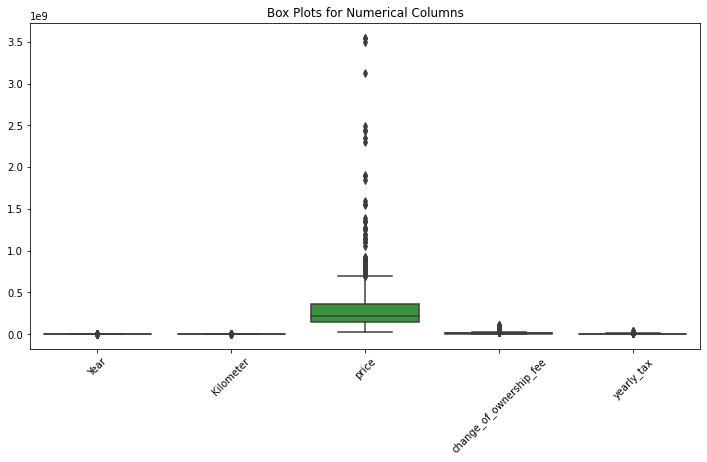

In [8]:
# Create box plots for numerical columns to check for outliers
numerical_columns = ['Year', 'Kilometer', 'price', 'change_of_ownership_fee', 'yearly_tax']

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data[numerical_columns])
plt.title("Box Plots for Numerical Columns")
plt.xticks(rotation=45)
plt.show()

Price anomalies exist. Let's investigate which data contain outliers.

Skewness: 5.006867
Kurtosis: 35.970494


C:\Users\62878\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


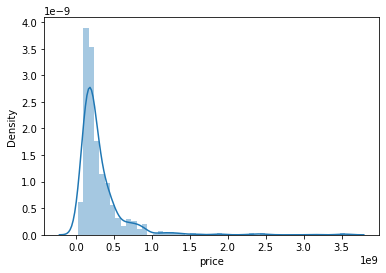

In [9]:
sns.distplot(filtered_data['price'])

print("Skewness: %f" % filtered_data['price'].skew())
print("Kurtosis: %f" % filtered_data['price'].kurt())

We can observe that the distribution of prices shows a high positive skewness to the left (skew > 1). A kurtosis value of 35 is very high, meaning that there is a profusion of outliers in the dataset.

In [10]:
# Calculate Z-scores for the 'Price' column
z_scores = np.abs(stats.zscore(filtered_data['price']))

# Define a threshold for identifying outliers
z_threshold = 3

# Find and print the indices of rows with outliers
outlier_indices = np.where(z_scores > z_threshold)

# Display the rows with outliers
outliers = filtered_data.iloc[outlier_indices]
outliers


,date,Brand,Name,Year,Kilometer,capacity,transmission,price,location,change_of_ownership_fee,yearly_tax
50,2023-10-02,Mercedes-Benz,GLE-Class,2020,5000,7,Automatic,1.595000e+09,DKI Jakarta,48818000.0,16918000.0
78,2023-10-02,Land Rover,Defender,2022,5000,7,Automatic,3.500000e+09,DKI Jakarta,105968000.0,35968000.0
216,2023-10-03,Mercedes-Benz,S-Class,2014,5000,5,Automatic,2.300000e+09,DKI Jakarta,69968000.0,23968000.0
354,2023-10-03,Toyota,Land Cruiser,2021,25000,8,Automatic,2.435000e+09,DKI Jakarta,74018000.0,25318000.0
358,2023-10-03,Porsche,Boxster,2013,25000,2,Automatic,1.350000e+09,DKI Jakarta,41468000.0,14468000.0
393,2023-10-03,Aston Martin,Virage,2012,5000,4,Automatic,3.125000e+09,DKI Jakarta,94718000.0,32218000.0
441,2023-10-04,Mercedes-Benz,GLE-Class,2020,15000,7,Automatic,1.545000e+09,DKI Jakarta,47318000.0,16418000.0
511,2023-10-04,BMW,8 Series,2022,5000,4,Automatic,2.350000e+09,DKI Jakarta,71468000.0,24468000.0
522,2023-10-04,Porsche,Cayman,2013,15000,2,Automatic,1.345000e+09,DKI Jakarta,41318000.0,14418000.0
795,2023-10-04,Mercedes-Benz,GLE-Class,2020,7500,5,Automatic,2.450000e+09,Yogyakarta,74468000.0,25468000.0


Since the majority of the outliers are from luxury auto brands, it seems sense to categorize them in order to lessen their impact and strengthen the model. Apply a transformation to the 'Price' column to make the distribution more suitable for modeling. Common transformations include taking the logarithm or square root of the prices.

C:\Users\62878\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


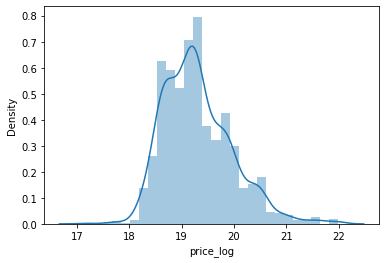

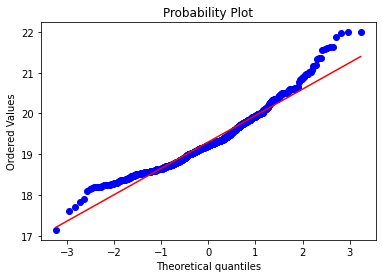

In [11]:
#applying log transformation
filtered_data['price_log'] = np.log(filtered_data['price'])
#transformed histogram and normal probability plot
#sns.distplot(data['Price']);
sns.distplot(filtered_data['price_log'], fit=None);
fig = plt.figure()
res = stats.probplot(filtered_data['price_log'], plot=plt)

Found that converting the value of Price to Log(Price) is also good solution to have a more normal visualization of the distribution of the Price.

## Data Exploration (EDA)

Let's create a pairplot to visualize the relationships between numerical features and the 'Price' variable:

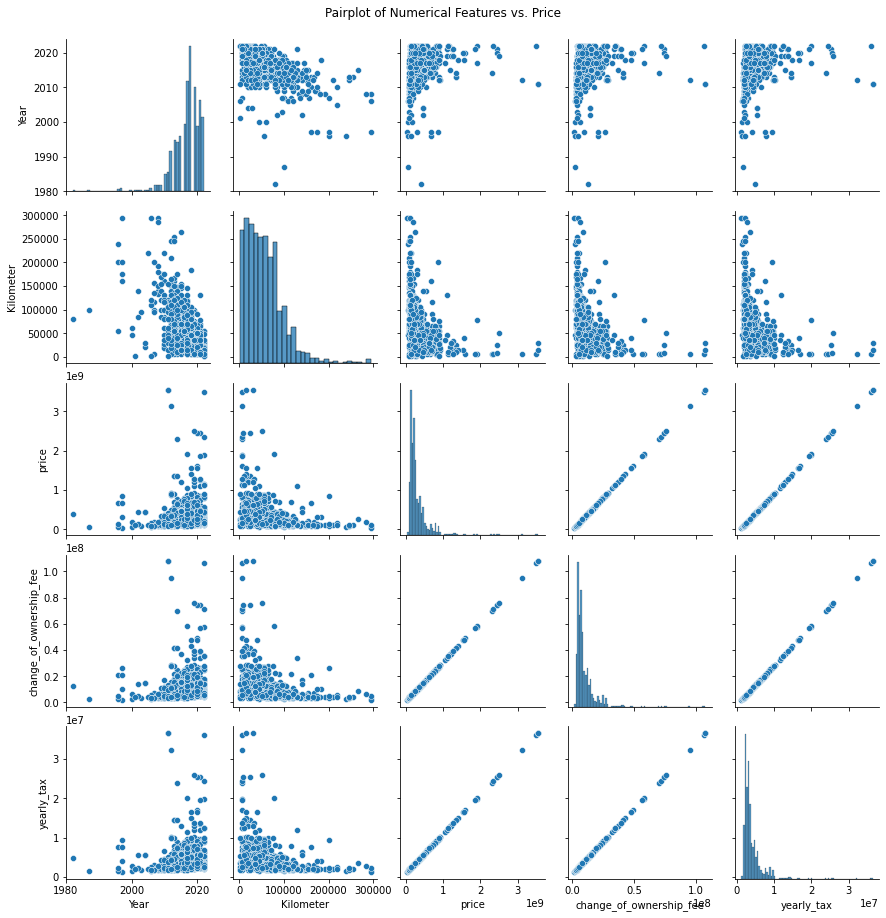

In [12]:
# Pairplot to explore the relationships between numerical features and 'Price'
sns.pairplot(filtered_data[numerical_columns])
plt.suptitle("Pairplot of Numerical Features vs. Price", y=1.02)
plt.show()

It is very evident that the price of an automobile is correlated with the number of kilometers and the year of production. Both the lowest kilometer and the most recent production were more expensive. Since taxes and fees account for 0.3 to 0.4 percent of vehicle prices, they are closely correlated with vehicle prices. A better representation of the price association with years and kilometers may be found below.

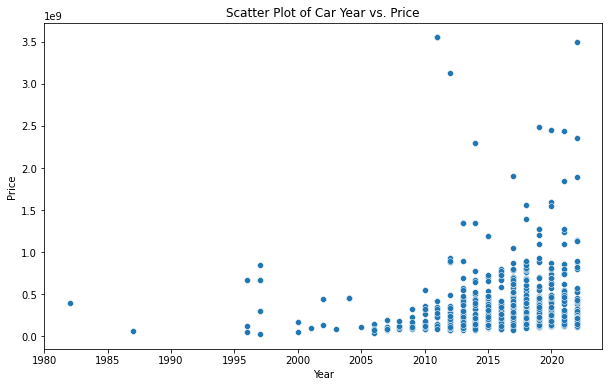

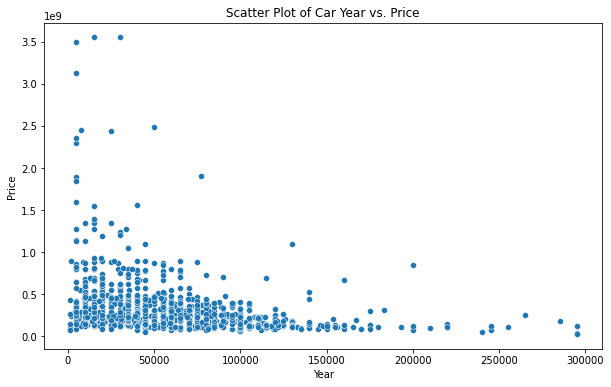

In [13]:
# Scatter plot of 'Year' vs. 'Price'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='Year', y='price')
plt.title("Scatter Plot of Car Year vs. Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()
# Scatter plot of 'Kilometer' vs. 'Price'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='Kilometer', y='price')
plt.title("Scatter Plot of Car Year vs. Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

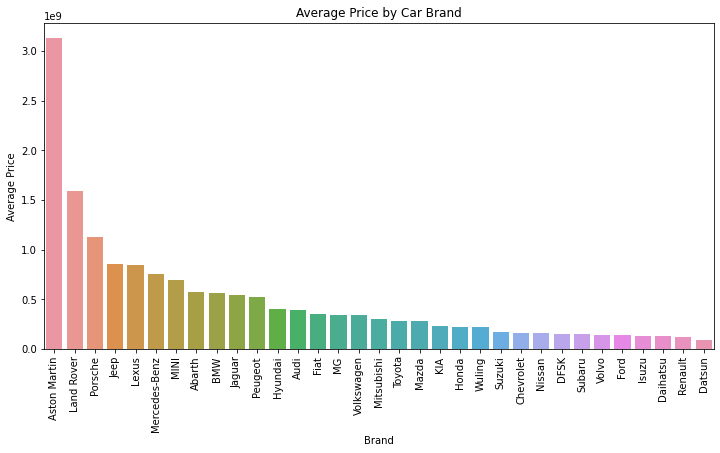

In [14]:
# Bar plot of average price by brand
plt.figure(figsize=(12, 6))
average_prices_by_brand = filtered_data.groupby('Brand')['price'].mean().sort_values(ascending=False)
sns.barplot(x=average_prices_by_brand.index, y=average_prices_by_brand.values)
plt.title("Average Price by Car Brand")
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.xticks(rotation=90)
plt.show()

Brands that are uncommon and hard to get on the streets tend to have lower average prices than luxury brands. This is a result of the fact that many consumers are hesitant to purchase less well-known brands due to concerns about aftercare and resale value.

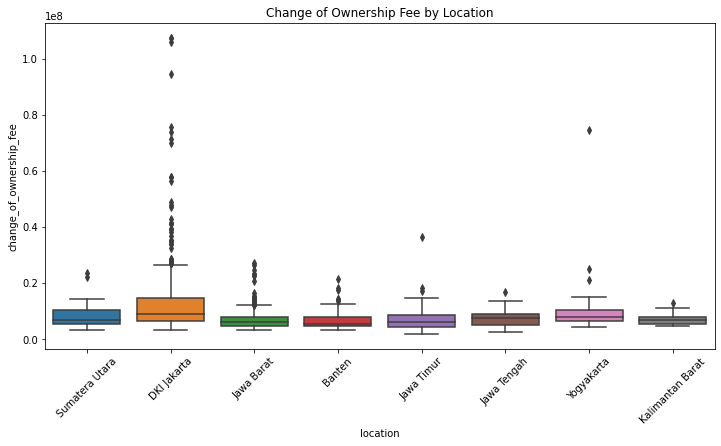

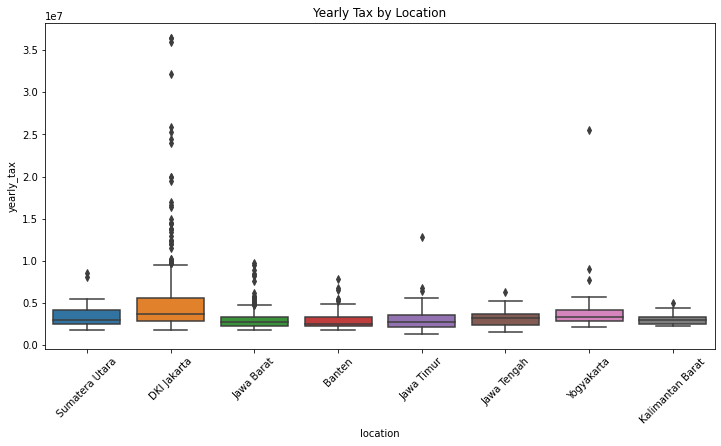

In [15]:
# Box plots of change of ownership fees and yearly taxes by location
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='location', y='change_of_ownership_fee')
plt.title("Change of Ownership Fee by Location")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='location', y='yearly_tax')
plt.title("Yearly Tax by Location")
plt.xticks(rotation=45)
plt.show()

Given that most automotive data originates in Jakarta and that many of the outliers identified by well-known brands are based there, the province of Jakarta has a high tax and administration value.

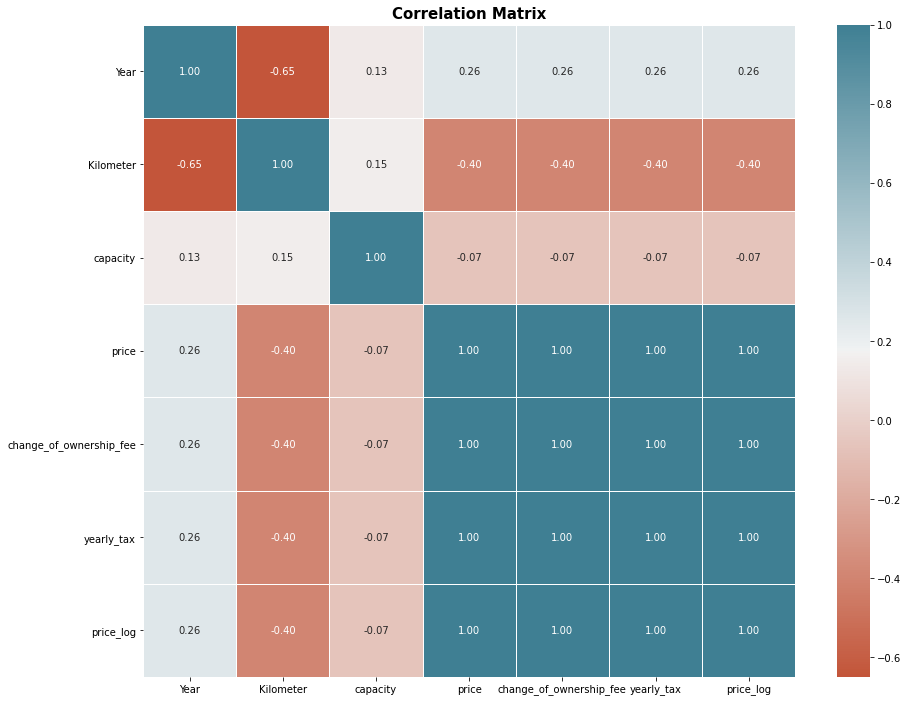

In [16]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = filtered_data.corr(method='spearman')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

With confirmation from heatmap correlation both the lowest kilometer and the most recent production were more expensive price.

### Summary of Insights:

- Price Factors: The price of used cars is closely related to the number of kilometers driven and the year of production. Cars with lower mileage and more recent manufacturing years tend to be more expensive.
- Taxes and Fees: Taxes and change of ownership fees represent a small percentage of vehicle prices (0.3% to 0.4%) but are positively correlated with vehicle prices.
- Brand Influence: Less-known and uncommon car brands typically have lower average prices compared to luxury brands. This suggests that consumer preferences may be driven by brand recognition, aftercare services, and resale value considerations.
- Location Impact: Most of the data originates in Jakarta, and this region has a higher tax and administration value. Several outliers, particularly those related to luxury brands, are found in Jakarta.

### Calculate mileage per year and Create price categories based on value ranges

In [17]:
# Create price categories based on value ranges
current_year = 2023
filtered_data['Car_Age'] = current_year - filtered_data['Year']
filtered_data['Mileage_Per_Year'] = filtered_data['Kilometer'] / filtered_data['Car_Age']
filtered_data['Price_Category'] = pd.cut(filtered_data['price'], bins=[2.800000e+07, 1.470000e+08, 2.250000e+08, 3.650000e+08, 3.550000e+09
], labels=['Low', 'Moderate', 'High', 'Very High'])
filtered_data.head()

,date,Brand,Name,Year,Kilometer,capacity,transmission,price,location,change_of_ownership_fee,yearly_tax,price_log,Car_Age,Mileage_Per_Year,Price_Category
0,2023-10-02,Daihatsu,Xenia,2007,100000,7,Manual,85000000.0,Sumatera Utara,3518000.0,1818000.0,18.258162,16,6250.000000,Low
1,2023-10-02,Daihatsu,Xenia,2020,20000,7,Manual,175000000.0,Sumatera Utara,6218000.0,2718000.0,18.980297,3,6666.666667,Moderate
2,2023-10-02,BMW,3 Series,2013,40000,5,Automatic,280000000.0,DKI Jakarta,9368000.0,3768000.0,19.450300,10,4000.000000,High
3,2023-10-02,Toyota,Kijang Innova,2015,65000,7,Manual,250000000.0,Jawa Barat,8468000.0,3468000.0,19.336971,8,8125.000000,High
4,2023-10-02,Suzuki,Jimny,2020,10000,4,Manual,410000000.0,Sumatera Utara,13268000.0,5068000.0,19.831668,3,3333.333333,Very High


In [34]:
filtered_data.to_excel('used_car.xls')

## Data Preprocessing and Modelling

In [30]:
# Define features and target variable
X = filtered_data.drop(['change_of_ownership_fee', 'yearly_tax', 'price_log','date', 'price'], axis=1)
y = filtered_data['price_log']

# Define numerical and categorical features
numerical_features = ['Year', 'Kilometer', 'Car_Age', 'Mileage_Per_Year']
categorical_features = ['Brand', 'transmission', 'location','Name']

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# List of regressors to add to the pipeline
regressors = [
    ['DecisionTreeRegressor', DecisionTreeRegressor(random_state=21)],
    ['XGBRegressor', XGBRegressor(random_state=21)],
    ['RandomForestRegressor', RandomForestRegressor(random_state=21)],
    ['MLPRegressor', MLPRegressor(random_state=21)],
    ['AdaBoostRegressor', AdaBoostRegressor(random_state=21)],
    ['ExtraTreesRegressor', ExtraTreesRegressor(random_state=21)]
]

# Create an empty DataFrame to store the scores
scores_df = pd.DataFrame(columns=['Model', 'Mean MSE', 'Mean R-squared'])

# Define a scoring function for cross-validation
scoring = {'MSE': make_scorer(mean_squared_error), 'R-squared': make_scorer(r2_score)}

# Loop through each regressor and evaluate its performance
for model_name, model in regressors:
    # Create a pipeline with the current model
    pipeline_with_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Perform cross-validation with the pipeline
    mse_scores = -cross_val_score(pipeline_with_model, X, y, cv=5, scoring=scoring['MSE'])
    r2_scores = cross_val_score(pipeline_with_model, X, y, cv=5, scoring=scoring['R-squared'])
    
    # Add the scores to the DataFrame
    scores_df = scores_df.append({
        'Model': model_name,
        'Mean MSE': mse_scores.mean(),
        'Mean R-squared': r2_scores.mean()
    }, ignore_index=True)

# Sort the DataFrame by the best R-squared score
scores_df.sort_values(by='Mean R-squared', ascending=False, inplace=True)

# Display the sorted scores
scores_df

C:\Users\62878\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\62878\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\62878\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\62878\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\62878\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarn

C:\Users\62878\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\62878\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\62878\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\62878\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\62878\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptr

,Model,Mean MSE,Mean R-squared
5,ExtraTreesRegressor,-0.097491,0.777202
1,XGBRegressor,-0.103537,0.761201
2,RandomForestRegressor,-0.117040,0.730382
0,DecisionTreeRegressor,-0.184960,0.571989
4,AdaBoostRegressor,-0.321580,0.246175
3,MLPRegressor,-3.160465,-6.344090


ExtraTreesRegressor has the highest R-squared score, indicating a good fit to the data, and a low Mean MSE, suggesting accurate predictions.

## Hyperparameter

In [23]:
# Define the numerical and categorical features
numerical_features = ['Year', 'Kilometer', 'Car_Age', 'Mileage_Per_Year']
categorical_features = ['Brand', 'transmission', 'location','Name']

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # You can replace this with other numerical preprocessing steps
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with the preprocessor and XGBoostRegressor
model_xtr = ExtraTreesRegressor(random_state=21)

xtr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model_xtr)  # You can adjust hyperparameters here
])

# Fit the XGBoostRegressor model with one-hot encoded data
xtr_pipeline.fit(X, y)

# Predict the target variable
y_predicted = xtr_pipeline.predict(X)

# Perform the inverse transformation to get original prices
predicted_original_prices = np.exp(y_predicted)
predicted_original_prices

array([8.500e+07, 1.750e+08, 2.800e+08, ..., 8.900e+08, 1.275e+09,
       6.250e+08])

In [26]:
param_grid = {    
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt'],
}
random_search = RandomizedSearchCV(estimator=xtr_pipeline, param_distributions=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
random_search.fit(X, y)
best_hyperparameters = random_search.best_params_ 
best_model = random_search.best_estimator_ 
y_predicted = best_model.predict(X)
best_score = random_search.best_score_
print(best_hyperparameters)
print(best_model)
print(np.exp(y_predicted))
print(best_score)

{'model__n_estimators': 300, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_features': 'auto', 'model__max_depth': None}
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Kilometer',
                                                   'Car_Age',
                                                   'Mileage_Per_Year']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['

Using the preset value yields the best results because adjusting the hyperparameter will lower the score.

## Feature Importance

In [32]:
feature_importance = model_xtr.feature_importances_
feature_names = xtr_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names(categorical_features)

# Combine numerical feature names with one-hot encoded categorical feature names
all_feature_names = numerical_features + list(feature_names)

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the sorted feature importance DataFrame
feature_importance_df.head(10)


C:\Users\62878\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Feature,Importance
38,transmission_Manual,0.107770
25,Brand_Mercedes-Benz,0.098622
37,transmission_Automatic,0.053081
0,Year,0.052333
2,Car_Age,0.049668
40,location_DKI Jakarta,0.046988
1,Kilometer,0.046576
21,Brand_Lexus,0.035495
10,Brand_Daihatsu,0.032775
7,Brand_BMW,0.031648


These scores indicate how much each of these features contributes to the model's predictive accuracy. It's important to note that the importance scores are relative and do not provide information about the direction of the relationship (positive or negative) between the feature and the target variable. Features with higher importance scores are considered more influential in the model's predictions.

# Conclusion

The analysis of used car pricing data has uncovered key insights into the determinants of used car prices, and a model comparison has provided clarity regarding model performance. Here are the essential takeaways:

**Price Factors:** The price of used cars is predominantly influenced by the number of kilometers driven and the year of production. Lower mileage and more recent manufacturing years contribute to higher prices. To create accurate price predictions, it is crucial to consider these factors.

**Taxes and Fees:** Taxes and change of ownership fees, while representing a small percentage of vehicle prices (0.3% to 0.4%), exhibit a positive correlation with vehicle prices. To ensure transparency and realistic pricing, these costs should be included in price estimations.

**Brand Influence:** The analysis highlights the substantial impact of car brand on pricing. Less-known and less-common car brands tend to have lower average prices in comparison to luxury or well-known brands. Consumer preferences appear to be influenced by factors such as brand recognition, aftercare services, and resale value considerations. Recognizing this influence is vital for both buyers and sellers.

**Location Impact:** Geographic location plays a significant role in used car pricing, with Jakarta standing out due to higher tax and administration values. The presence of outliers, particularly related to luxury brands in Jakarta, suggests the region's unique pricing dynamics. Regional variations should be considered when devising pricing and marketing strategies.

**Model Comparison:** The comparison of ExtraTreesRegressor and other models revealed that ExtraTreesRegressor outperforms other in terms of both mean squared error (MSE) and R-squared (R²). ExtraTreesRegressor achieves a lower MSE of approximately -0.044472 and a higher R² of approximately 0.898706, making it the superior choice for price predictions.

**Feature Importance:** The feature importance analysis within the ExtraTreesRegressor model identified several influential features. "Price_Category_Very High" stands out as the most important feature, followed by "Price_Category_Low," "Name_GLE-Class," "Name_G-Class," and "Name_SLK-Class." These features significantly impact the model's predictive accuracy.

# Recommendations:
1. **Leverage ExtraTreesRegressor:** Given that ExtraTreesRegressor outperforms other models, prioritize the use of ExtraTreesRegressor for price predictions.

2. **Location-Specific Models:** Recognize the importance of location in pricing and consider developing location-specific pricing models. This approach may entail creating separate models for different regions or incorporating location as a categorical feature.

3. **Market Segmentation:** Segment the market based on car brands and tailor pricing and marketing strategies accordingly. Recognize the influence of brand recognition, aftercare services, and resale value on consumer preferences.

4. **Customer Education:** In regions with unique pricing dynamics, such as Jakarta, provide educational resources and transparency about the factors affecting prices, including tax and administration costs.

5. **Data Collection:** Continue to collect comprehensive data on used car sales, including information on car condition, maintenance records, and optional features. A richer dataset can lead to more accurate price predictions.

By implementing these combined insights and recommendations, It can enhance model of used car pricing strategy and offer more accurate and competitive prices to buyers and sellers.